In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
rdd = sc.textFile("/user/centos/ccFraud.csv")

In [3]:
#remove header:
header = rdd.first()

In [4]:
header

u'"custID","gender","state","cardholder","balance","numTrans","numIntlTrans","creditLine","fraudRisk"'

In [5]:
rdd2 = rdd.filter(lambda row: row != header).map(
lambda row: [int(x) for x in row.split(",")])

In [6]:
rdd2.take(2)

[[1, 1, 35, 1, 3000, 4, 14, 2, 0], [2, 2, 2, 1, 0, 9, 0, 18, 0]]

In [7]:
import pyspark.sql.types as typ

In [8]:
fields = [typ.StructField(h[1:-1],typ.IntegerType(),True) for h in header.split(",")]

In [9]:
fields

[StructField(custID,IntegerType,true),
 StructField(gender,IntegerType,true),
 StructField(state,IntegerType,true),
 StructField(cardholder,IntegerType,true),
 StructField(balance,IntegerType,true),
 StructField(numTrans,IntegerType,true),
 StructField(numIntlTrans,IntegerType,true),
 StructField(creditLine,IntegerType,true),
 StructField(fraudRisk,IntegerType,true)]

In [10]:
schema = typ.StructType(fields)
fraud_df = spark.createDataFrame(rdd2,schema)

In [11]:
#now, plot histogram:
hists = fraud_df.rdd.flatMap(lambda row:row).histogram(20) #you calculated hist
#for all columns. idiot. do it for one column only man.

In [14]:
hists_balance = fraud_df.select("balance").rdd.flatMap(lambda row:row).histogram(20)

In [12]:
%%javascript
var rate = 0;
// apply setting to  all current CodeMirror instances
IPython.notebook.get_cells().map(
    function(c) {  return c.code_mirror.options.cursorBlinkRate=rate;  }
);

// make sure new CodeMirror instance also use this setting
CodeMirror.defaults.cursorBlinkRate=rate;

<IPython.core.display.Javascript object>

In [15]:
hists_balance

([0.0,
  2074.25,
  4148.5,
  6222.75,
  8297.0,
  10371.25,
  12445.5,
  14519.75,
  16594.0,
  18668.25,
  20742.5,
  22816.75,
  24891.0,
  26965.25,
  29039.5,
  31113.75,
  33188.0,
  35262.25,
  37336.5,
  39410.75,
  41485],
 [3640021,
  2258778,
  1718633,
  1035019,
  601524,
  343461,
  192766,
  104486,
  54517,
  27570,
  13117,
  5805,
  2650,
  1103,
  358,
  127,
  45,
  15,
  1,
  4])

In [16]:
data = {'bins':hists_balance[0][:-1],'frequencies':hists_balance[1]}

<Container object of 20 artists>

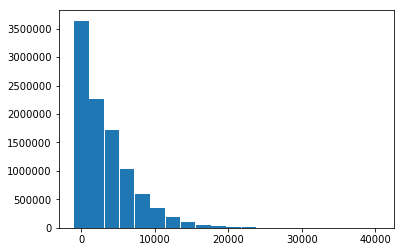

In [18]:
plt.bar(data['bins'],data['frequencies'],width = 2000)

In [1]:
#now working on the the next chapter.
#downloaded a dataset related to birth prediction. copied it to hdfs at /user/centos

In [2]:
#gonna use that dataset.
import pyspark.sql.types as typ

In [4]:
labels = [    ('INFANT_ALIVE_AT_REPORT', typ.IntegerType()),    ('BIRTH_PLACE', typ.StringType()),    ('MOTHER_AGE_YEARS', typ.IntegerType()),    ('FATHER_COMBINED_AGE', typ.IntegerType()),    ('CIG_BEFORE', typ.IntegerType()),    ('CIG_1_TRI', typ.IntegerType()),    ('CIG_2_TRI', typ.IntegerType()),    ('CIG_3_TRI', typ.IntegerType()),    ('MOTHER_HEIGHT_IN', typ.IntegerType()),    ('MOTHER_PRE_WEIGHT', typ.IntegerType()),    ('MOTHER_DELIVERY_WEIGHT', typ.IntegerType()),    ('MOTHER_WEIGHT_GAIN', typ.IntegerType()),    ('DIABETES_PRE', typ.IntegerType()),    ('DIABETES_GEST', typ.IntegerType()),    ('HYP_TENS_PRE', typ.IntegerType()),    ('HYP_TENS_GEST', typ.IntegerType()),    ('PREV_BIRTH_PRETERM', typ.IntegerType())]

In [5]:
labels # a list of tuples.

[('INFANT_ALIVE_AT_REPORT', IntegerType),
 ('BIRTH_PLACE', StringType),
 ('MOTHER_AGE_YEARS', IntegerType),
 ('FATHER_COMBINED_AGE', IntegerType),
 ('CIG_BEFORE', IntegerType),
 ('CIG_1_TRI', IntegerType),
 ('CIG_2_TRI', IntegerType),
 ('CIG_3_TRI', IntegerType),
 ('MOTHER_HEIGHT_IN', IntegerType),
 ('MOTHER_PRE_WEIGHT', IntegerType),
 ('MOTHER_DELIVERY_WEIGHT', IntegerType),
 ('MOTHER_WEIGHT_GAIN', IntegerType),
 ('DIABETES_PRE', IntegerType),
 ('DIABETES_GEST', IntegerType),
 ('HYP_TENS_PRE', IntegerType),
 ('HYP_TENS_GEST', IntegerType),
 ('PREV_BIRTH_PRETERM', IntegerType)]

In [6]:
schema = typ.StructType([typ.StructField(e[0],e[1],False) for e in labels])

In [7]:
births = spark.read.csv('/user/centos/births_transformed.csv',header=True,schema=schema)

In [8]:
births.head()

Row(INFANT_ALIVE_AT_REPORT=0, BIRTH_PLACE=u'1', MOTHER_AGE_YEARS=29, FATHER_COMBINED_AGE=99, CIG_BEFORE=0, CIG_1_TRI=0, CIG_2_TRI=0, CIG_3_TRI=0, MOTHER_HEIGHT_IN=99, MOTHER_PRE_WEIGHT=999, MOTHER_DELIVERY_WEIGHT=999, MOTHER_WEIGHT_GAIN=99, DIABETES_PRE=0, DIABETES_GEST=0, HYP_TENS_PRE=0, HYP_TENS_GEST=0, PREV_BIRTH_PRETERM=0)

In [9]:
births.count()

45429

In [10]:
#using transformers. before we could use this dataset to do any type of 
#estimation.
#since statistical models can only operate on numerical data, will have to
#encode BIRTH_PLACE variable.
# as we are going to use a number of feature transformers, lets import them all

In [12]:
import pyspark.ml.feature as ft

In [13]:
births.select("BIRTH_PLACE").show(10)

+-----------+
|BIRTH_PLACE|
+-----------+
|          1|
|          1|
|          1|
|          1|
|          1|
|          1|
|          1|
|          1|
|          1|
|          1|
+-----------+
only showing top 10 rows



In [14]:
births.select("BIRTH_PLACE").distinct().show()

+-----------+
|BIRTH_PLACE|
+-----------+
|          7|
|          3|
|          5|
|          6|
|          9|
|          1|
|          4|
|          2|
+-----------+



In [17]:
births.groupby("BIRTH_PLACE").count().sort("count").show()

+-----------+-----+
|BIRTH_PLACE|count|
+-----------+-----+
|          9|    8|
|          6|   11|
|          5|   74|
|          7|   91|
|          2|  136|
|          3|  224|
|          4|  327|
|          1|44558|
+-----------+-----+



In [20]:
#anyways:
#to encode BIRTH_PLACE, we will use OneHotEncoder. it cannot accept StringType
#it can only deal with numeric so we will firstly cast the column as Int:
births = births.withColumn("BIRTH_PLACE_INT",
                           births["BIRTH_PLACE"].cast(typ.IntegerType()))
#to create a new column: use .withColumn("new_name",df['col'].cast(typ.IntegerType()))

In [21]:
births.printSchema()

root
 |-- INFANT_ALIVE_AT_REPORT: integer (nullable = true)
 |-- BIRTH_PLACE: string (nullable = true)
 |-- MOTHER_AGE_YEARS: integer (nullable = true)
 |-- FATHER_COMBINED_AGE: integer (nullable = true)
 |-- CIG_BEFORE: integer (nullable = true)
 |-- CIG_1_TRI: integer (nullable = true)
 |-- CIG_2_TRI: integer (nullable = true)
 |-- CIG_3_TRI: integer (nullable = true)
 |-- MOTHER_HEIGHT_IN: integer (nullable = true)
 |-- MOTHER_PRE_WEIGHT: integer (nullable = true)
 |-- MOTHER_DELIVERY_WEIGHT: integer (nullable = true)
 |-- MOTHER_WEIGHT_GAIN: integer (nullable = true)
 |-- DIABETES_PRE: integer (nullable = true)
 |-- DIABETES_GEST: integer (nullable = true)
 |-- HYP_TENS_PRE: integer (nullable = true)
 |-- HYP_TENS_GEST: integer (nullable = true)
 |-- PREV_BIRTH_PRETERM: integer (nullable = true)
 |-- BIRTH_PLACE_INT: integer (nullable = true)



In [22]:
encoder = ft.OneHotEncoder(inputCol="BIRTH_PLACE_INT",
                          outputCol="BIRTH_PLACE_VEC")

In [25]:
#now create a single column with all the features collated together. 
#use VectorAssembler
featuresCreator = ft.VectorAssembler(
inputCols=[col[0] for col in labels[2:]] + [encoder.getOutputCol()],
outputCol="features")

so in the above cell, we used vectorAssembler. okay.
it required two parameters:
inputCol
outputCol.

outputCol was simple: just specify what will the resulting column name be.
in the case of inputCol, you provide a list.
now you constructed the list from the labels list. labels list was a list of tuples. so you traversed that. and got the requirement tuple element. the intent was to add BIRTH_PLACE_INT instead of BIRTH_PLACE
and also you added another list which was the output of encoder. and it was a string so you wrapped it around [] to make it a list. 

In [1]:
x={'a':1} #a sample dictionary

In [2]:
x['a']

1